# Advanced Regression using Ridge and Lasso
## Assignment is divided into following parts:
- Data Understanding
- EDA and Data Cleaning
- Dummy variables Encoding
- Splitting the data into Training and Testing sets
- Building Model - Linear, Ridge and Lasso Regression
- Feature elimination by using Lasso
- Recursive Feature Elimination (RFE)
- Residual Analysis on train data
- Looking for patterns in the residuals
- Model Evaluation
- Conclusion
- Assignment Part 2 - Subjective Questions Calculation and Analysis



## Importing Libraries

In [564]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')
import os

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [565]:
# To display all coulmns of a dataframe
pd.set_option('display.max_column', None)

# To display all rows of a dataframe
pd.set_option('display.max_rows', None)

# To display all items of a long sequence
pd.set_option('display.max_seq_items', None)

# To display complete contents inside a cell in dataframe
pd.set_option('display.max_colwidth', None)

pd.set_option('expand_frame_repr', True)

## Data Understanding and Exploration
### Understanding of dataset

In [566]:
# reading the dataset
house_df = pd.read_csv("C:\\All_application_files\\upgrad\\Lasso_Ridge_assingment\\train.csv")

In [567]:
# head
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [568]:
house_df.shape
# 1460 rows and 81 columns

(1460, 81)

In [569]:
house_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## In data dictionary "NA"is seen as category for several categorical variables. This adds confusion with actual NA/missing values.
## Therefore we are explicitly mapping it to the respective category for better understanding

In [570]:
# Fetch categorical column
catCols = house_df.select_dtypes("object").columns
#catCols= list(set(catCols))
print(catCols)

# Code to get categories in missing value columns
print("Categories with missing values: ")
house_df[catCols].isnull().sum()

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Categories with missing values: 


MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [571]:
house_df[['Alley']] = house_df[['Alley']].fillna(value="No alley access")
house_df[['BsmtQual']] = house_df[['BsmtQual']].fillna(value="No Basement")
house_df[['BsmtCond']] = house_df[['BsmtCond']].fillna(value="No Basement")
house_df[['BsmtExposure']] = house_df[['BsmtExposure']].fillna(value="No Basement")
house_df[['BsmtFinType1']] = house_df[['BsmtFinType1']].fillna(value="No Basement")
house_df[['BsmtFinType2']] = house_df[['BsmtFinType2']].fillna(value="No Basement")
house_df[['FireplaceQu']] = house_df[['FireplaceQu']].fillna(value="No Fireplace")
house_df[['GarageType']] = house_df[['GarageType']].fillna(value="No Garage")
house_df[['GarageFinish']] = house_df[['GarageFinish']].fillna(value="No Garage")
house_df[['GarageQual']] = house_df[['GarageQual']].fillna(value="No Garage")
house_df[['GarageCond']] = house_df[['GarageCond']].fillna(value="No Garage")
house_df[['PoolQC']] = house_df[['PoolQC']].fillna(value="No Pool")
house_df[['Fence']] = house_df[['Fence']].fillna(value="No Fence")
house_df[['MiscFeature']] = house_df[['MiscFeature']].fillna(value="None MiscFeature")
house_df[['MasVnrType']] = house_df[['MasVnrType']].fillna(value="None MasVnrType")

# Custom Map Functions

In [572]:
# Defining the OverallQual and OverallCond map function
def mapping_func(x):
    return x.map({10:"Very Excellent",
                  9:"Excellent",
                  8:"Very Good",
                  7:"Good",
                  6:"Above Average",
                  5:"Average",
                  4:"Below Average",
                  3:"Fair",
                  2:"Poor",
                  1:"Very Poor"})

# Map function for OverallCond column
house_df[["OverallCond"]] = house_df[["OverallCond"]].apply(mapping_func)
# Map function for  OverallQual column
house_df[["OverallQual"]] = house_df[["OverallQual"]].apply(mapping_func)

# Data Cleaning
## Count the NaN values across all columns in the dataframe

In [573]:
house_df.isna().sum(axis = 0)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [574]:
house_df.dropna(axis=1, how='all',inplace=True)

In [575]:
house_df.shape

(1460, 81)

In [576]:
house_df.isna().mean(axis = 0).round(4)*100

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

##  Observations:
### 1.  Few columns contain NaN values.
### 2. Do not drop these columns as NaN % is not very high.
### 3. It's good to impute these columns with mean/median for numeric and for categorical variable with mode.
### 4. GarageYrBlt is special case. We will derive another feature out of it.

Text(0.5, 1.0, 'Distribution of MasVnrArea')

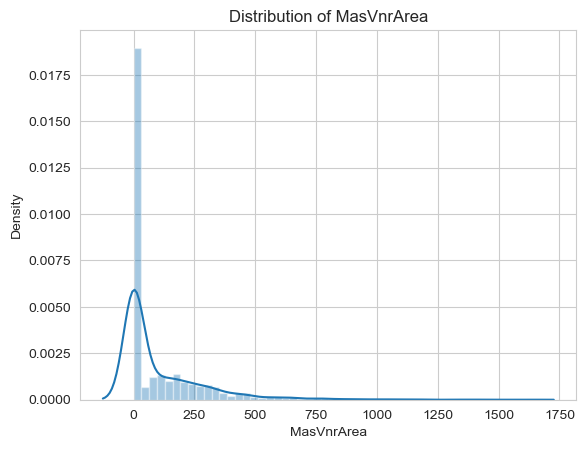

In [577]:
#Distribution plot- histogram
sns.distplot(house_df['MasVnrArea']).set_title("Distribution of MasVnrArea")

In [578]:
house_df[["MasVnrArea"]].describe()

,MasVnrArea
count,1452.000000
mean,103.685262
std,181.066207
min,0.000000
25%,0.000000
50%,0.000000
75%,166.000000
max,1600.000000


## Plot show data is right skewed.
## Imputing with median.

In [579]:
house_df[["MasVnrArea"]] = house_df[["MasVnrArea"]].fillna(value=house_df["MasVnrArea"].median())

Text(0.5, 1.0, 'Distribution of LotFrontage')

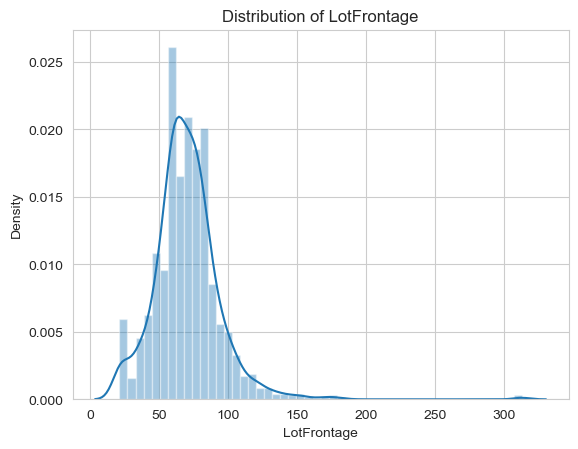

In [580]:
#distribution plot- histogram
sns.set_style('whitegrid')
sns.distplot(house_df['LotFrontage']).set_title("Distribution of LotFrontage")

In [581]:
house_df[["LotFrontage"]].describe()

,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


## Plot show  both mean and median are close enough
## Can impute with any of them. Selecting "mean"

In [582]:
house_df[["LotFrontage"]] = house_df[["LotFrontage"]].fillna(value=house_df["LotFrontage"].mean())

In [583]:
house_df.groupby(['Electrical'], dropna=False, as_index=False).size()

,Electrical,size
0,FuseA,94
1,FuseF,27
2,FuseP,3
3,Mix,1
4,SBrkr,1334
5,NaN,1


## Only one missing value.
## Impute it with mode.

In [584]:
house_df[["Electrical"]] = house_df[["Electrical"]].fillna(value=house_df['Electrical'].mode().get(key=0))

## Deriving new features from variables containing years

In [585]:
house_df['YearBuilt_Age'] = house_df.YearBuilt.max()-house_df.YearBuilt
house_df['YearRemodAdd_Age'] = house_df.YearRemodAdd.max()-house_df.YearRemodAdd
house_df['GarageYrBlt_Age'] = house_df.GarageYrBlt.max()-house_df.GarageYrBlt
house_df['YrSold_Age'] = house_df.YrSold.max()-house_df.YrSold

In [586]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None MiscFeature,0,2,2008,WD,Normal,208500,7,7,7.0,2
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None MiscFeature,0,5,2007,WD,Normal,181500,34,34,34.0,3
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None MiscFeature,0,9,2008,WD,Normal,223500,9,8,9.0,2
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None MiscFeature,0,2,2006,WD,Abnorml,140000,95,40,12.0,4
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None MiscFeature,0,12,2008,WD,Normal,250000,10,10,10.0,2


In [587]:
house_df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Age','YearRemodAdd_Age',
             'GarageYrBlt_Age','YrSold_Age']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
463,1934,1995,1939.0,2008,76,15,71.0,2
757,1978,1978,1978.0,2010,32,32,32.0,0
1398,1950,1982,1950.0,2009,60,28,60.0,1
902,2003,2003,2003.0,2006,7,7,7.0,4
330,1964,1964,2002.0,2007,46,46,8.0,3
527,2008,2008,2008.0,2008,2,2,2.0,2
507,2009,2009,2009.0,2009,1,1,1.0,1
617,1954,1954,1962.0,2008,56,56,48.0,2
1226,2007,2007,2007.0,2008,3,3,3.0,2
881,1990,1991,1990.0,2007,20,19,20.0,3


## Dropping following variables

In [588]:
house_df = house_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

## imputing missing GarageYrBlt_Age with -1

In [589]:
house_df[["GarageYrBlt_Age"]] = house_df[["GarageYrBlt_Age"]].fillna(value = -1)

## Drop Id column

In [590]:
house_df = house_df.drop('Id',axis='columns')

In [591]:
house_df.shape

(1460, 80)

In [592]:
house_df.describe()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,22.024023,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,70.049958,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


## Correlation using Heatmap

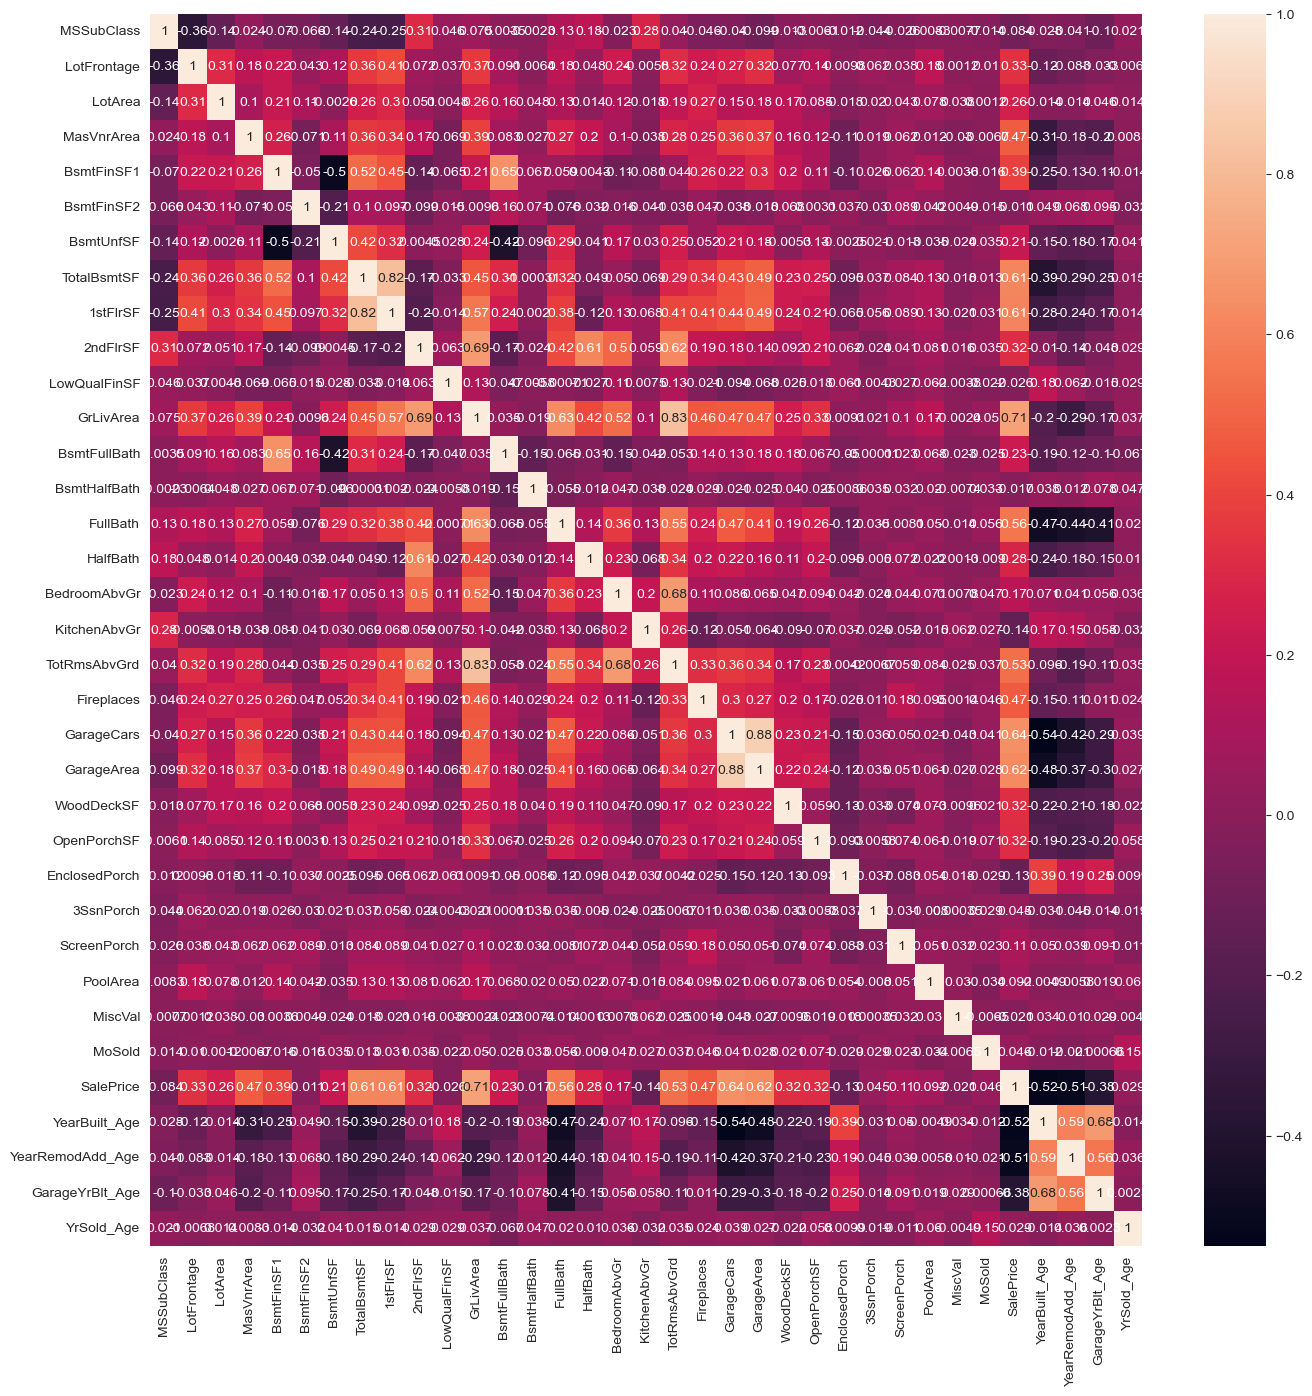

In [593]:
plt.figure(figsize=(16,16))
sns.heatmap(house_df.corr(),annot=True)
plt.show()

## Box Plot Analysis

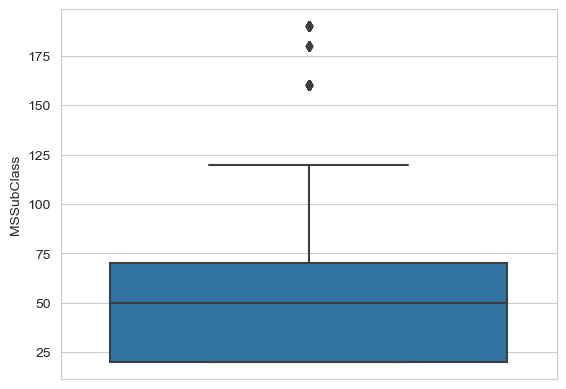

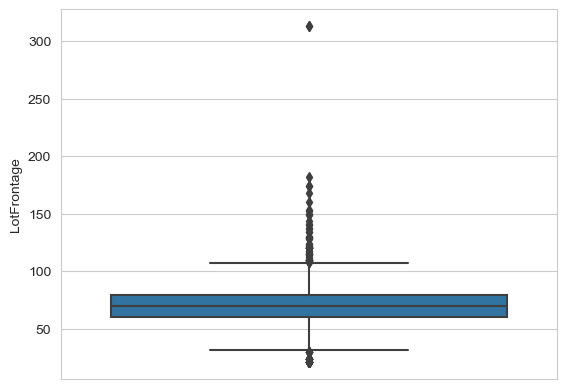

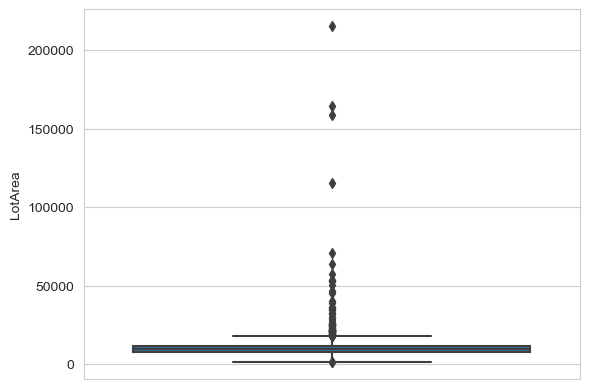

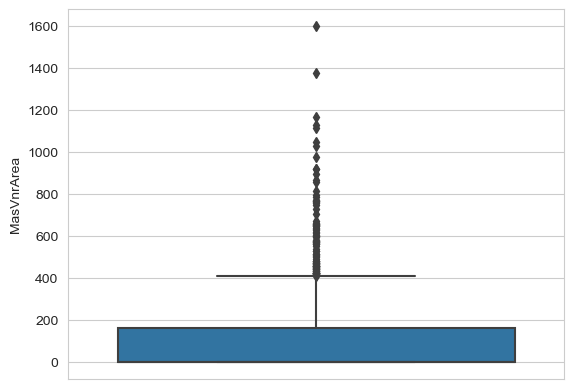

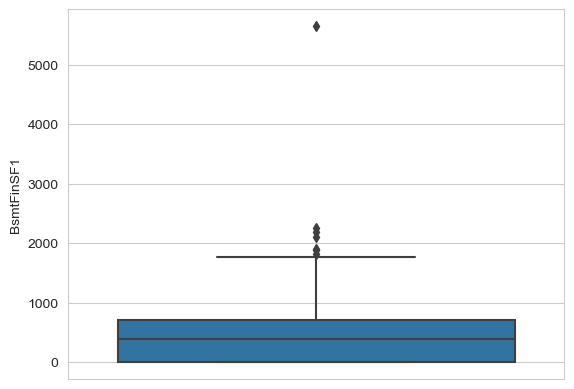

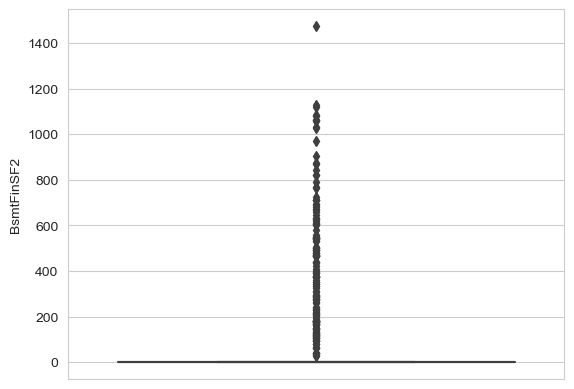

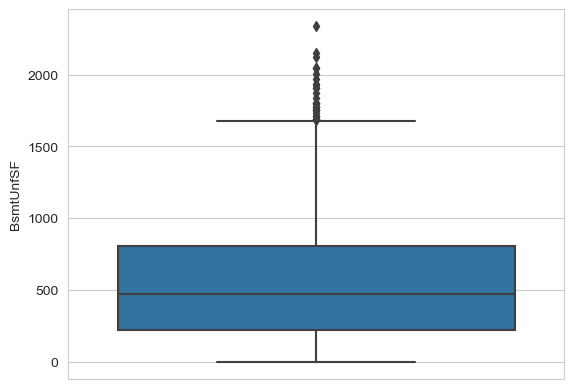

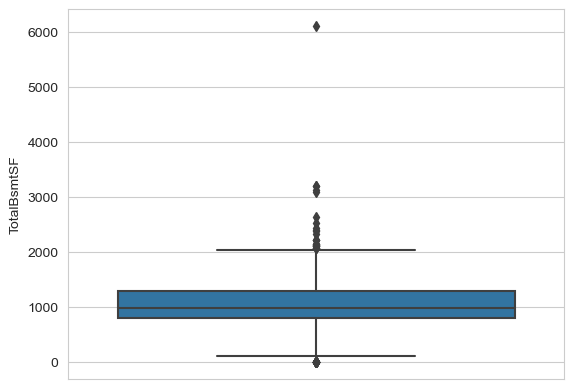

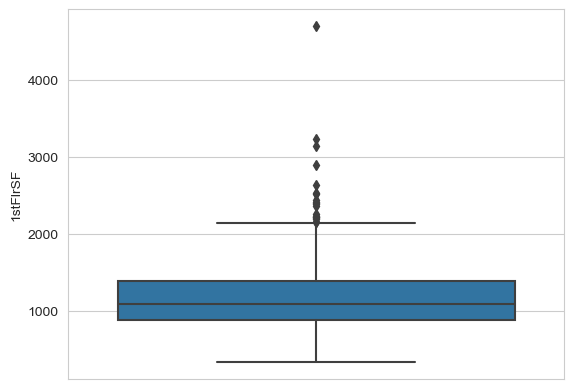

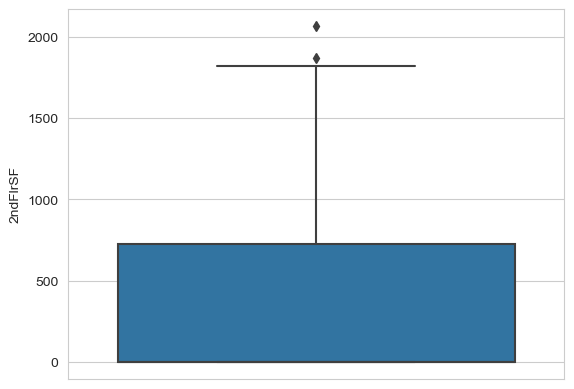

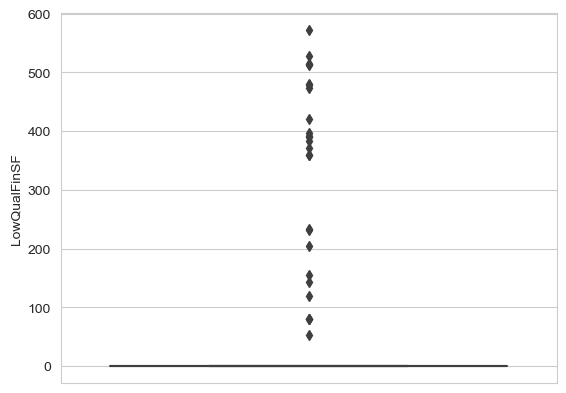

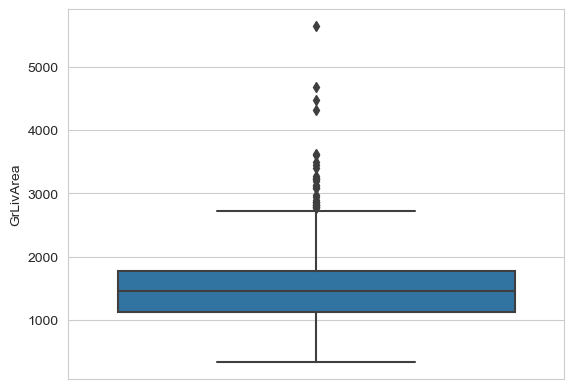

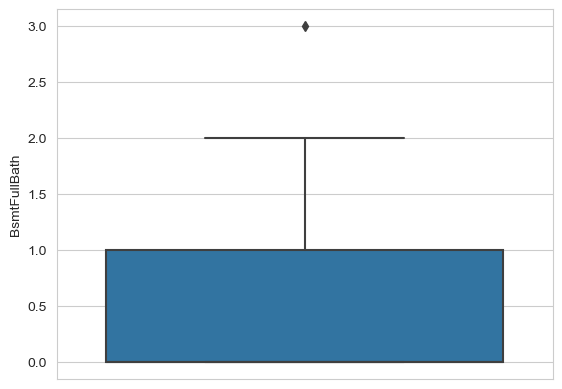

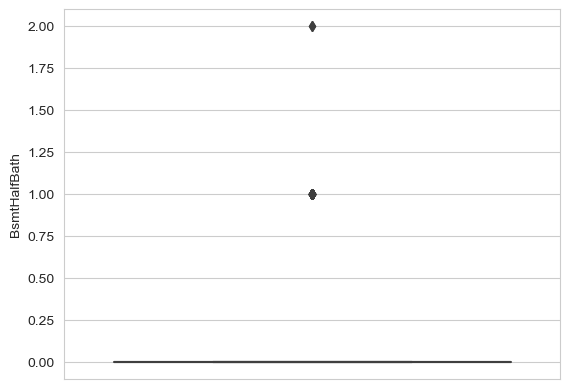

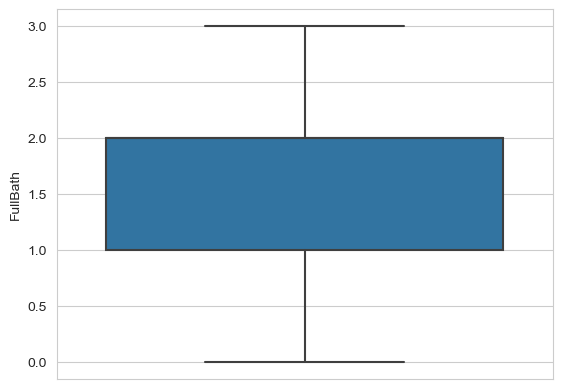

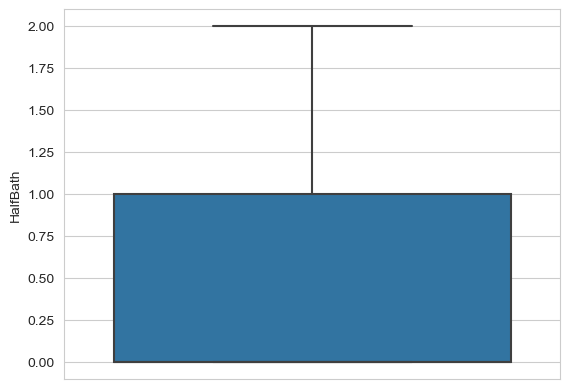

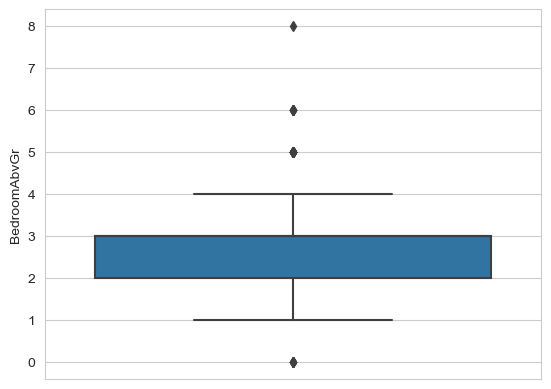

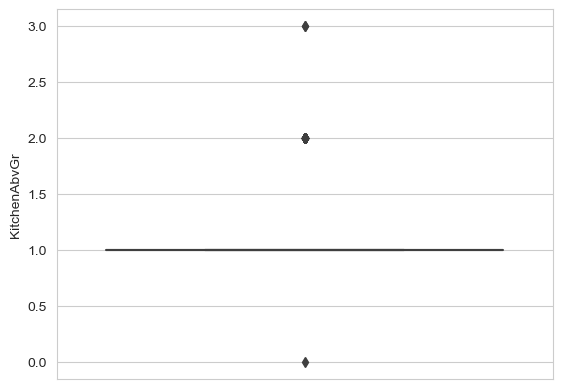

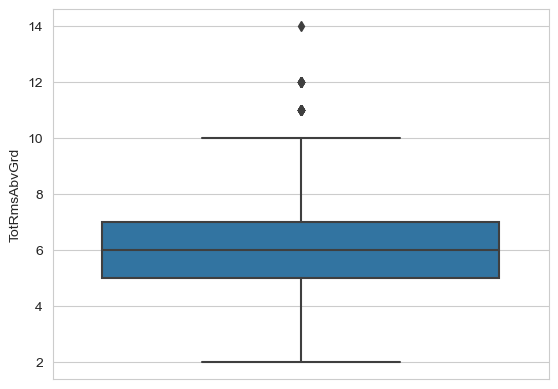

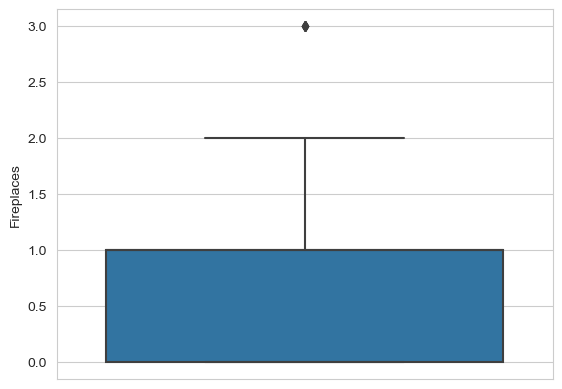

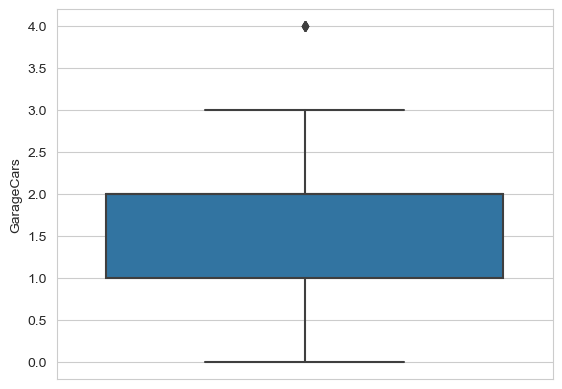

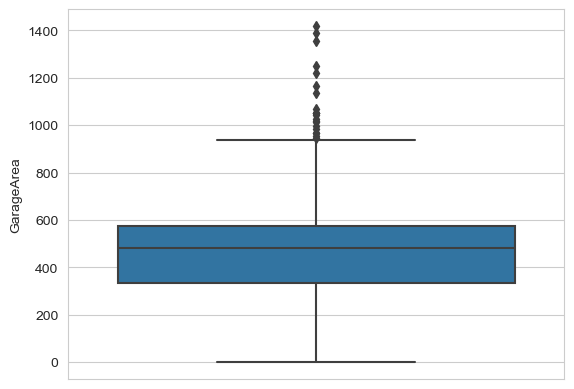

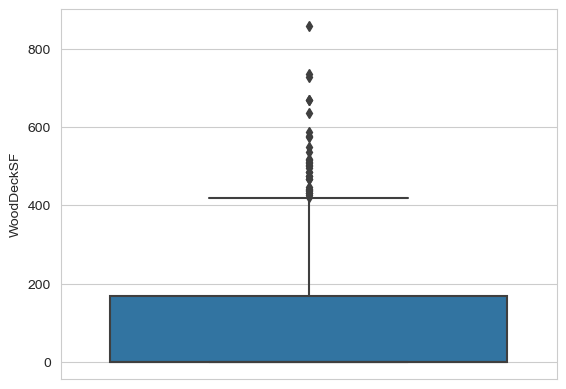

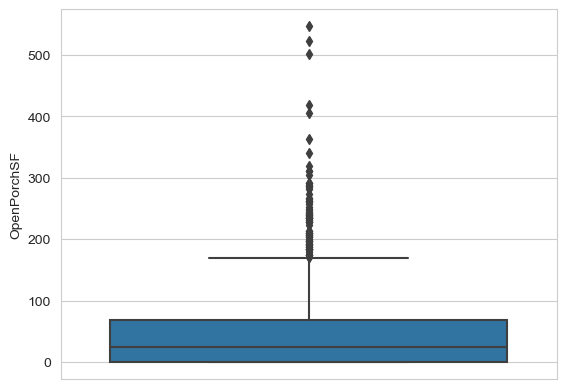

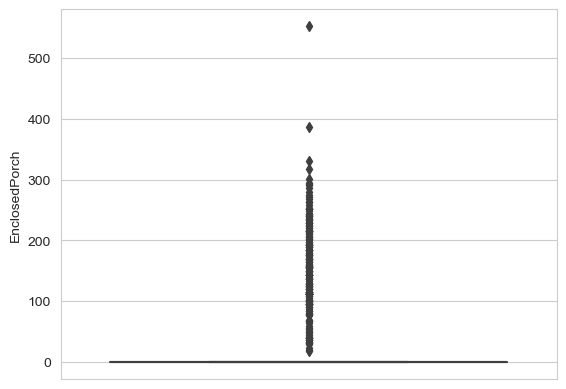

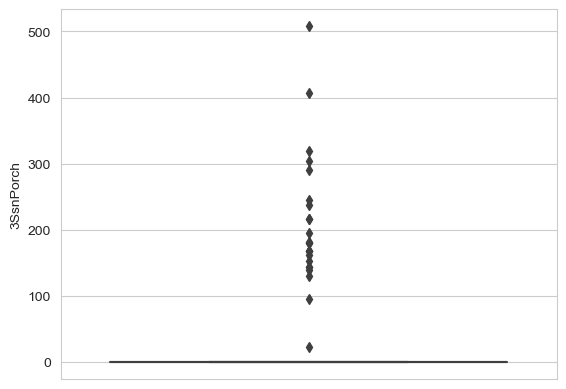

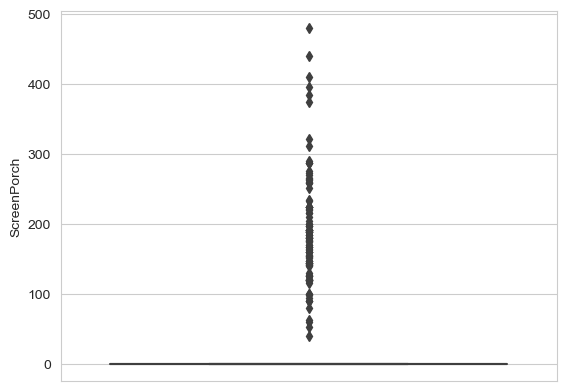

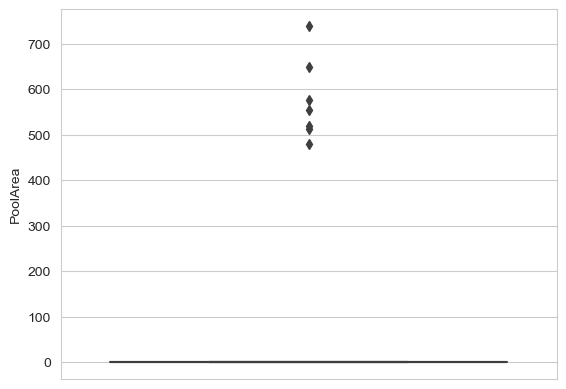

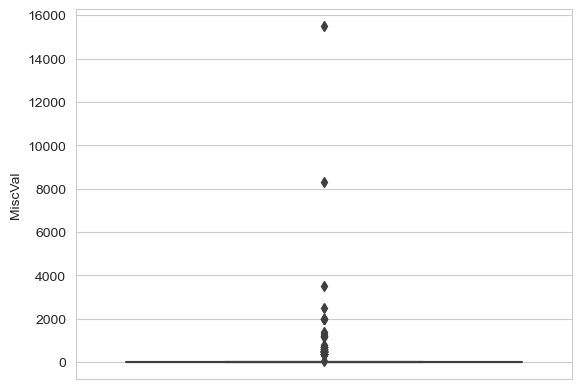

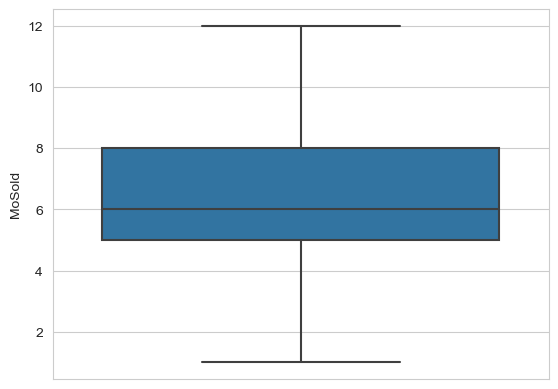

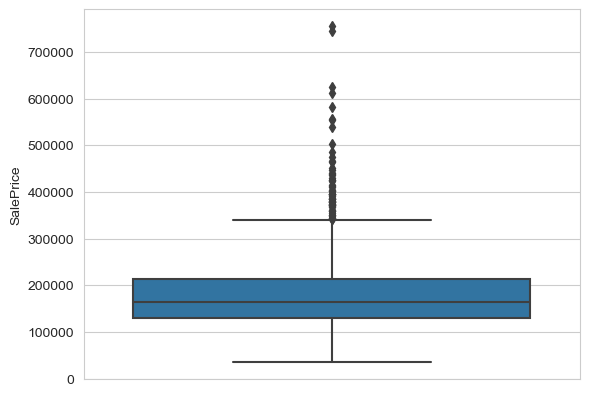

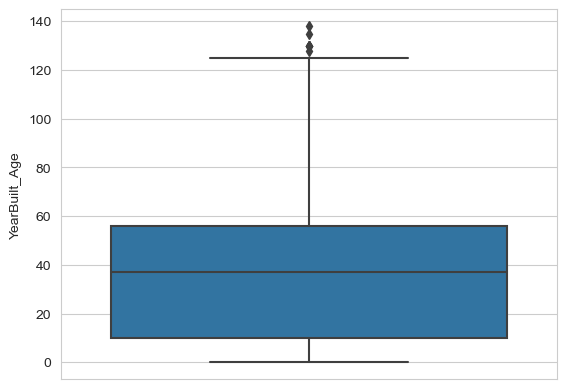

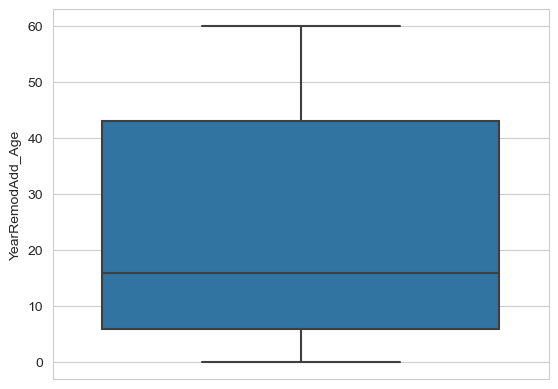

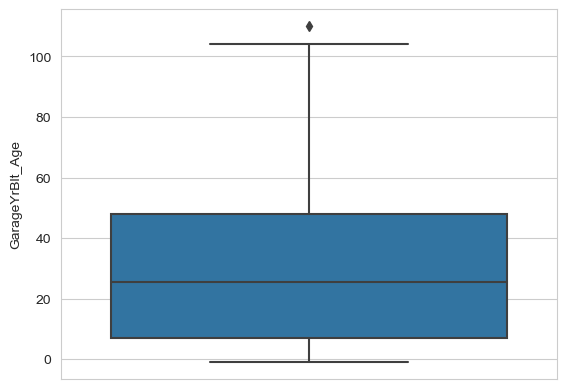

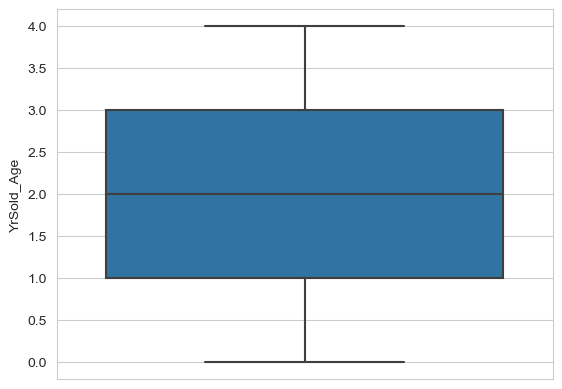

In [594]:
num_columns = house_df.select_dtypes(exclude=[object]) # Get numerical features
for col in num_columns:
    plt.figure()
    sns.boxplot(y=house_df[col])
    plt.show()

## From above plot we can see there are several outliers in numerical variables.


# Outlier Removal

### Not using Q3 threshold of .75 because that is reducing total records to 579 from 1460

In [595]:
num_col = list(house_df.dtypes[house_df.dtypes !='object'].index)

def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_df = drop_outliers(house_df)

In [596]:
house_df.shape

(1439, 80)

## Remove highly correlated features

In [597]:
correlated_features = set()
correlation_matrix = house_df.drop('SalePrice', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [598]:
correlation_matrix

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
MSSubClass,1.000000,-0.395490,-0.283156,0.028476,-0.075194,-0.064655,-0.139230,-0.251020,-0.259678,0.308791,0.045754,0.077080,-0.000093,-0.002723,0.128984,0.180802,-0.027485,0.276154,0.036343,-0.046751,-0.034906,-0.095502,-0.021605,-0.005831,-0.015924,-0.037645,-0.024966,NaN,-0.055858,-0.016616,-0.031814,-0.049940,-0.101190,0.024230
LotFrontage,-0.395490,1.000000,0.402362,0.180115,0.132788,0.036737,0.154900,0.316752,0.362284,0.058923,0.015642,0.319015,0.053506,-0.015965,0.177173,0.051388,0.243951,-0.000748,0.310072,0.216606,0.291058,0.316824,0.089010,0.131930,-0.012265,0.061996,0.047484,NaN,0.010557,0.018112,-0.128829,-0.074770,-0.043774,-0.009815
LotArea,-0.283156,0.402362,1.000000,0.138469,0.210681,0.076165,0.047399,0.298575,0.374766,0.101381,0.004383,0.363481,0.130547,0.024147,0.159051,0.076803,0.190708,-0.015888,0.296860,0.306113,0.257345,0.281863,0.224521,0.148035,-0.021259,0.049853,0.098714,NaN,0.005081,0.008028,-0.038565,-0.028555,0.034010,0.027167
MasVnrArea,0.028476,0.180115,0.138469,1.000000,0.245058,-0.070073,0.115736,0.350599,0.331826,0.177039,-0.067511,0.389749,0.079882,0.023951,0.276647,0.200261,0.105462,-0.035521,0.281633,0.241533,0.364466,0.365064,0.162467,0.113456,-0.109265,0.029472,0.062578,NaN,-0.054705,-0.000636,-0.310364,-0.172902,-0.199100,0.008765
BsmtFinSF1,-0.075194,0.132788,0.210681,0.245058,1.000000,-0.060787,-0.516628,0.466170,0.395023,-0.168027,-0.075820,0.140308,0.655741,0.070849,0.041335,-0.006321,-0.121079,-0.080737,0.012544,0.232822,0.232447,0.274908,0.203478,0.092255,-0.114574,0.047268,0.066651,NaN,-0.010253,0.002897,-0.252757,-0.124791,-0.112150,-0.015223
BsmtFinSF2,-0.064655,0.036737,0.076165,-0.070073,-0.060787,1.000000,-0.204952,0.104183,0.094948,-0.104278,0.011186,-0.018159,0.150148,0.072510,-0.083322,-0.036724,-0.021769,-0.042901,-0.046202,0.035590,-0.041774,-0.020864,0.069951,0.006189,0.033111,-0.029440,0.077387,NaN,-0.029285,-0.013124,0.048424,0.064951,0.091573,-0.035057
BsmtUnfSF,-0.139230,0.154900,0.047399,0.115736,-0.516628,-0.204952,1.000000,0.447422,0.340329,0.005948,0.033790,0.259218,-0.419504,-0.097160,0.299421,-0.042297,0.171180,0.032940,0.260665,0.060192,0.214025,0.186623,-0.000217,0.127804,0.001184,-0.003218,-0.007139,NaN,-0.045486,0.033427,-0.148733,-0.182094,-0.169320,0.042145
TotalBsmtSF,-0.251020,0.316752,0.298575,0.350599,0.466170,0.104183,0.447422,1.000000,0.808694,-0.208387,-0.038532,0.414309,0.293059,-0.001757,0.329136,-0.065676,0.047810,-0.065376,0.272329,0.319545,0.452885,0.475917,0.238083,0.234076,-0.105004,0.034340,0.091455,NaN,-0.070283,0.033487,-0.402012,-0.298183,-0.261217,0.015484
1stFlrSF,-0.259678,0.362284,0.374766,0.331826,0.395023,0.094948,0.340329,0.808694,1.000000,-0.230661,-0.016318,0.538406,0.224323,0.002149,0.382672,-0.134634,0.124324,0.080431,0.401287,0.392937,0.449774,0.478982,0.232901,0.196737,-0.068603,0.057462,0.094615,NaN,-0.046919,0.043562,-0.283962,-0.240772,-0.178285,0.012414
2ndFlrSF,0.308791,0.058923,0.101381,0.177039,-0.168027,-0.104278,0.005948,-0.208387,-0.230661,1.000000,0.053111,0.690596,-0.174468,-0.032436,0.417284,0.613404,0.498621,0.052745,0.611264,0.186720,0.182312,0.131859,0.098254,0.203343,0.048197,-0.016339,0.031927,NaN,-0.013219,0.036410,-0.011994,-0.142599,-0.051939,0.022974


## Remove features whose correlation is greater than 0.8

In [599]:
correlated_features

{'1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'}

In [600]:
house_df = house_df.drop(correlated_features, axis='columns')

In [601]:
house_df.shape

(1439, 77)

In [602]:
house_df_numerical = house_df.select_dtypes(exclude=[object]) # Get numerical features

In [603]:
house_df_category = house_df.select_dtypes(include=[object]) # Get categorical features

In [604]:
house_df_category.shape

(1439, 45)

In [605]:
house_df_numerical.shape

(1439, 32)

## Label encoding used for the categorcal features to find the skewness among them. In model building, will use dummy encoding for categorical features

In [606]:
house_df_temp = house_df.copy()

for col in house_df_category:
    le = preprocessing.LabelEncoder()
    house_df_temp[col] = le.fit_transform(house_df_temp[col])

In [607]:
house_df_temp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
0,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,5,1,1,0,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,4,854,0,1710,1,0,2,1,3,1,2,6,0,3,1,2,2,5,5,2,0,61,0,0,0,0,0,4,0,0,2,8,4,208500,7,7,7.0,2
1,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,0,7,1,0,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,0,0,1262,0,1,2,0,3,1,3,6,1,5,1,2,2,5,5,2,298,0,0,0,0,0,0,4,0,0,5,8,4,181500,34,34,34.0,3
2,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,5,1,1,0,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,866,0,1786,1,0,2,1,3,1,2,6,1,5,1,2,2,5,5,2,0,42,0,0,0,0,0,4,0,0,9,8,4,223500,9,8,9.0,2
3,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,5,1,1,0,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,4,756,0,1717,1,0,1,0,3,1,2,6,1,2,5,3,3,5,5,2,0,35,272,0,0,0,0,4,0,0,2,8,0,140000,95,40,12.0,4
4,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,1,1,0,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1053,0,2198,1,0,2,1,4,1,2,6,1,5,1,2,3,5,5,2,192,84,0,0,0,0,0,4,0,0,12,8,4,250000,10,10,10.0,2


In [608]:
house_df_temp.shape

(1439, 77)

In [609]:
house_df_temp["Alley"].value_counts()

1    1348
0      50
2      41
Name: Alley, dtype: int64

In [610]:
house_df["Alley"].value_counts()

No alley access    1348
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

In [611]:
house_df.shape

(1439, 77)

### Case 1:Symmetrical Data- If the skewness is between -0.5 and 0.5, then the data is fairly symmetrical
### Case 2: Moderately skewed - If the skewness is between -1 and -0.5 or between 0.5 and 1, then the data is moderately skewed
### Case 3:Highly skewed - If the skewness is less than -1 or greater than 1, then the data is highly skewed

## Handling case 3 here

In [612]:
house_df_temp.skew()

MSSubClass           1.403321
MSZoning            -1.728339
LotFrontage          0.628617
LotArea              3.992372
Street             -16.893737
Alley               -0.319335
LotShape            -0.614422
LandContour         -3.198209
Utilities           37.934153
LotConfig           -1.153395
LandSlope            4.873013
Neighborhood         0.033526
Condition1           3.059608
Condition2          11.072253
BldgType             2.234674
HouseStyle           0.306687
OverallQual          0.744011
OverallCond          1.389454
RoofStyle            1.480072
RoofMatl             8.454380
Exterior1st         -0.729639
Exterior2nd         -0.701605
MasVnrType           1.117914
MasVnrArea           2.693438
ExterQual           -1.831903
ExterCond           -2.603941
Foundation           0.057016
BsmtQual            -0.498801
BsmtCond            -2.953596
BsmtExposure        -1.120590
BsmtFinType1         0.100517
BsmtFinSF1           0.785873
BsmtFinType2        -3.218612
BsmtFinSF2

In [613]:
skewed_cols = []

In [614]:
for col in house_df_temp.columns:
    if col != "SalePrice":
        if house_df_temp[col].skew() < -1 or house_df_temp[col].skew() > 1:
            skewed_cols.append(col)

In [615]:
len(skewed_cols)

44

## Removing skewness from original house_df.
## Other categorical features are present in their original form.

In [616]:
house_df = house_df.drop(skewed_cols, axis='columns')

In [617]:
house_df.shape

(1439, 33)

In [618]:
house_df.head()

,LotFrontage,Alley,LotShape,Neighborhood,HouseStyle,OverallQual,Exterior1st,Exterior2nd,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PoolArea,PoolQC,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
0,65.0,No alley access,Reg,CollgCr,2Story,Good,VinylSd,VinylSd,PConc,Gd,GLQ,706,150,856,Ex,854,1,2,1,3,0,No Fireplace,Attchd,RFn,2,0,No Pool,2,208500,7,7,7.0,2
1,80.0,No alley access,Reg,Veenker,1Story,Above Average,MetalSd,MetalSd,CBlock,Gd,ALQ,978,284,1262,Ex,0,0,2,0,3,1,TA,Attchd,RFn,2,0,No Pool,5,181500,34,34,34.0,3
2,68.0,No alley access,IR1,CollgCr,2Story,Good,VinylSd,VinylSd,PConc,Gd,GLQ,486,434,920,Ex,866,1,2,1,3,1,TA,Attchd,RFn,2,0,No Pool,9,223500,9,8,9.0,2
3,60.0,No alley access,IR1,Crawfor,2Story,Good,Wd Sdng,Wd Shng,BrkTil,TA,ALQ,216,540,756,Gd,756,1,1,0,3,1,Gd,Detchd,Unf,3,0,No Pool,2,140000,95,40,12.0,4
4,84.0,No alley access,IR1,NoRidge,2Story,Very Good,VinylSd,VinylSd,PConc,Gd,GLQ,655,490,1145,Ex,1053,1,2,1,4,1,TA,Attchd,RFn,3,0,No Pool,12,250000,10,10,10.0,2


In [619]:
#  Fetch Numerical features
house_df_numerical = house_df.select_dtypes(exclude=[object])

In [620]:
#  Fetch Numerical features
house_df_category = house_df.select_dtypes(include=[object])

In [621]:
house_df_category.shape

(1439, 15)

In [622]:
house_df_numerical.shape

(1439, 18)

## Dummy variables Encoding

In [623]:
dummy_vars_cols = []

In [624]:
for col in house_df_category:
    dummy_vars = pd.get_dummies(house_df_category[col],prefix=col,drop_first = True)
    dummy_vars_cols = dummy_vars_cols + list(dummy_vars.columns)
    house_df[dummy_vars.columns]= dummy_vars

In [625]:
house_df.head()

,LotFrontage,Alley,LotShape,Neighborhood,HouseStyle,OverallQual,Exterior1st,Exterior2nd,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PoolArea,PoolQC,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
0,65.0,No alley access,Reg,CollgCr,2Story,Good,VinylSd,VinylSd,PConc,Gd,GLQ,706,150,856,Ex,854,1,2,1,3,0,No Fireplace,Attchd,RFn,2,0,No Pool,2,208500,7,7,7.0,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,80.0,No alley access,Reg,Veenker,1Story,Above Average,MetalSd,MetalSd,CBlock,Gd,ALQ,978,284,1262,Ex,0,0,2,0,3,1,TA,Attchd,RFn,2,0,No Pool,5,181500,34,34,34.0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,68.0,No alley access,IR1,CollgCr,2Story,Good,VinylSd,VinylSd,PConc,Gd,GLQ,486,434,920,Ex,866,1,2,1,3,1,TA,Attchd,RFn,2,0,No Pool,9,223500,9,8,9.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,60.0,No alley access,IR1,Crawfor,2Story,Good,Wd Sdng,Wd Shng,BrkTil,TA,ALQ,216,540,756,Gd,756,1,1,0,3,1,Gd,Detchd,Unf,3,0,No Pool,2,140000,95,40,12.0,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,84.0,No alley access,IR1,NoRidge,2Story,Very Good,VinylSd,VinylSd,PConc,Gd,GLQ,655,490,1145,Ex,1053,1,2,1,4,1,TA,Attchd,RFn,3,0,No Pool,12,2

In [626]:
house_df.shape

(1439, 140)

In [627]:
house_df = house_df.drop(house_df_category.columns, axis='columns')

In [628]:
house_df.shape

(1439, 125)

# Splitting the Data into Training and Testing Sets

In [629]:
np.random.seed(42)
house_df_train, house_df_test = train_test_split(house_df, train_size = 0.7, test_size = 0.3, random_state = 42)

In [630]:
house_df_train.head()

,LotFrontage,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,PoolArea,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
96,78.000000,1162,426,1588,0,0,2,0,3,0,2,0,8,214000,11,11,11.0,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1180,70.049958,1216,0,1216,1216,0,2,1,4,0,2,0,4,250000,20,19,20.0,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
445,73.000000,0,1436,1436,0,0,1,0,3,1,2,0,11,127500,54,54,54.0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1117,57.000000,702,192,894,0,1,1,0,3,0,2,0,5,130000,43,7,43.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
416,74.000000,209,463,672,728,0,1,1,3,1,2,0,3,149500,32,32,32.0,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0


In [631]:
len(dummy_vars_cols)

107

## Using MinMaxscaler() to all the columns except the '0-1' and 'dummy' variables

In [632]:
scaler = MinMaxScaler()

num_vars = list(house_df_numerical.columns)

house_df_train[num_vars] = scaler.fit_transform(house_df_train[num_vars])

In [633]:
house_df_train.head()

,LotFrontage,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,PoolArea,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
96,0.354037,0.514159,0.182363,0.495321,0.000000,0.0,0.666667,0.0,0.375,0.000000,0.5,0.0,0.636364,0.248715,0.081481,0.183333,0.108108,1.00,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1180,0.304658,0.538053,0.000000,0.379289,0.649573,0.0,0.666667,0.5,0.500,0.000000,0.5,0.0,0.272727,0.298709,0.148148,0.316667,0.189189,1.00,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
445,0.322981,0.000000,0.614726,0.447910,0.000000,0.0,0.333333,0.0,0.375,0.333333,0.5,0.0,0.909091,0.128593,0.400000,0.900000,0.495495,0.25,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1117,0.223602,0.310619,0.082192,0.278852,0.000000,0.5,0.333333,0.0,0.375,0.000000,0.5,0.0,0.363636,0.132065,0.318519,0.116667,0.396396,0.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
416,0.329193,0.092478,0.198202,0.209607,0.388889,0.0,0.333333,0.5,0.375,0.333333,0.5,0.0,0.181818,0.159145,0.237037,0.533333,0.297297,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0


In [634]:
house_df_train.describe()

,LotFrontage,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,PoolArea,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.0,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.00000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.0,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,0.300219,0.195746,0.239117,0.328235,0.189888,0.210526,0.522344,0.190665,0.359235,0.198279,0.443148,0.0,0.487406,0.202961,0.283953,0.421764,0.275853,0.545929,0.943396,0.022840,0.027805,0.005958,0.637537,0.000993,0.013903,0.037736,0.020854,0.101291,0.034757,0.062562,0.051639,0.026812,0.

### Now all values have been mapped between 0 and 1 where maximum value is 1 and minimum value is 0.

### Dividing into X and Y sets for the model building

In [635]:
y_train = house_df_train.pop('SalePrice')
## Assign all feature variables to X_train
X_train = house_df_train 

In [636]:
X_train.shape

(1007, 124)

In [637]:
house_df_test[num_vars] = scaler.transform(house_df_test[num_vars]) #scaling test set

In [638]:
y_test = house_df_test.pop('SalePrice')
X_test = house_df_test

In [639]:
X_test.shape

(432, 124)

## Model Building and Evaluation

## Linear Regression

 ## Predict house sale prices dataset using linear regression.

In [640]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [641]:
# Print the Coefficients and Intercept
print(lm.intercept_)
print(lm.coef_)

0.02455949480628783
[ 2.07077990e-02  1.82064770e-02 -4.47326416e-02  2.42044993e-01
  1.51424860e-01  1.26250729e-02  1.32666071e-02  1.10891629e-02
  1.76573026e-02  6.51429121e-02  7.08773413e-02  7.31195903e+11
 -1.00397753e-02  2.67498531e-02 -3.14874796e-02  1.76213718e-03
  8.33710925e-03  9.87253833e-04 -8.14667113e-03  2.50364239e-02
  9.27722148e-03 -9.65636724e-04 -1.44012180e-02 -5.17139879e-03
  2.83771507e-03  1.06218001e-02  7.00871526e-03  4.22090118e-02
 -2.72719219e-02  1.53941849e-03 -1.60348824e-02 -9.48910835e-03
 -1.38860393e-02 -4.48574886e-03 -3.84470446e-03 -3.83331751e-03
  5.99833741e-02  3.28960910e-02 -2.05510858e-02 -1.70022311e-03
 -4.36683203e-04  5.63129903e-03  2.17614030e-02  4.25041586e-02
  1.30987084e-02  3.78415423e-02  5.85152431e-03  1.26727812e-02
 -4.86063780e-03 -4.81691176e-02 -1.56652027e-02  1.27517622e-02
  2.12968892e-02 -8.82872397e-03 -1.33408186e-02  1.09359445e-01
 -3.19178500e-02  1.65072608e-02 -2.89848252e-02  1.70386656e-01
  4.9

In [642]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric.append(mse_test_lr**0.5)

Train R2 Score:  0.8909382152873989
Test R2 Score:  -1.0512932576849007e+19
Train RSS:  1.3131512603085338
Test RSS:  5.1115223788659925e+19
Train MSE:  0.0013040230986182063
Test MSE:  1.1832227728856464e+17


## Ridge Regression

In [643]:
# List of alphas to tune - Avoid too high value as it will lead to underfitting, and if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [644]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1.0}


In [645]:
#Fitting Ridge model for alpha = 2.0 and printing coefficients which have been penalised
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.22277229e-02  6.10945664e-02  1.25586846e-02  1.37099602e-01
  1.13122447e-01  1.82085866e-02  2.90651079e-02  1.96836798e-02
  2.21562307e-02  5.99607920e-02  6.48716034e-02  0.00000000e+00
 -9.74382322e-03  1.05530346e-02 -3.15102047e-02 -4.53617469e-04
  8.30952656e-03 -1.85685172e-03 -1.09671592e-02  3.02129339e-02
  4.03268385e-03 -3.09283793e-03 -9.56596644e-03 -1.47864134e-02
 -1.45314628e-03  7.86824223e-03  3.90112408e-04  3.68568902e-02
 -2.72552043e-02 -1.17680710e-02 -1.71685155e-02 -1.25961823e-02
 -2.11471742e-02 -7.81926898e-03 -4.80939283e-03 -8.59688431e-03
  5.47610837e-02  2.91084523e-02 -2.00506234e-02 -9.82574250e-03
 -6.69662971e-03 -9.30789690e-04  1.48144026e-02  4.01244963e-02
  3.61787515e-03  2.80235988e-02  3.97423791e-03  5.40000028e-03
  8.28466279e-03 -3.09261161e-02 -1.29751635e-02  8.75176952e-03
  1.28911636e-02 -8.83215587e-03 -1.46133900e-02  9.42547424e-02
 -2.54448791e-02  1.34849473e-02 -9.28978054e-03  1.48593449e-01
  4.75758785e-02 -2.39822

In [646]:
#Calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric2.append(mse_test_lr**0.5)

Train R2 Score:  0.8860239990252616
Test R2 Score:  0.8568297654035687
Train RSS:  1.3723205586568
Test RSS:  0.6961120056440968
Train MSE:  0.0013627810910196623
Test MSE:  0.0016113703834354093


## Lasso Regression

In [647]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [648]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [649]:
#Fit Lasso model for alpha = 0.0001 and print coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [650]:
lasso.coef_

array([ 2.92970277e-02,  4.49408580e-02, -8.50771115e-03,  2.06953951e-01,
        1.43099937e-01,  1.27602275e-02,  1.16885684e-02,  8.27537659e-03,
        2.47220379e-03,  5.25885818e-02,  6.33982157e-02,  0.00000000e+00,
       -7.99643185e-03, -0.00000000e+00, -3.31520182e-02, -0.00000000e+00,
        6.42118002e-03,  0.00000000e+00, -3.05606939e-03,  2.70010012e-02,
        0.00000000e+00, -3.02297337e-03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  4.04988404e-03,  2.04999932e-03,  4.01788607e-02,
       -2.05004150e-02, -3.52975769e-03, -8.21481816e-03, -0.00000000e+00,
       -1.30381376e-02, -3.62114013e-04, -0.00000000e+00, -0.00000000e+00,
        4.78076648e-02,  2.55044566e-02, -1.50721136e-02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  1.41415600e-02,  3.76663013e-02,
        2.93640818e-03,  2.16542189e-02,  0.00000000e+00,  3.96594649e-03,
        0.00000000e+00, -3.37641095e-02, -1.51177292e-02,  2.96501668e-03,
        1.25336623e-02, -

In [651]:
# Calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric3.append(mse_test_lr**0.5)

Train R2 Score:  0.8841842219638406
Test R2 Score:  0.8602910274689868
Train RSS:  1.3944722736067994
Test RSS:  0.6792829064587129
Train MSE:  0.0013847788218538225
Test MSE:  0.0015724141353210947


In [652]:
# Create a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.909382e-01,0.886024,0.884184
1,R2 Score (Test),-1.051293e+19,0.856830,0.860291
2,RSS (Train),1.313151e+00,1.372321,1.394472
3,RSS (Test),5.111522e+19,0.696112,0.679283
4,MSE (Train),3.611126e-02,0.036916,0.037213
5,MSE (Test),3.439801e+08,0.040142,0.039654


## Observe the changes in the coefficients after regularization

In [653]:
betas = pd.DataFrame({"Feature":X_train.columns})

In [654]:
betas.rows = X_train.columns

In [655]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [656]:
pd.set_option('display.max_rows', None)
betas

,Feature,Linear,Ridge,Lasso
0,LotFrontage,2.070780e-02,0.032228,0.029297
1,BsmtFinSF1,1.820648e-02,0.061095,0.044941
2,BsmtUnfSF,-4.473264e-02,0.012559,-0.008508
3,TotalBsmtSF,2.420450e-01,0.137100,0.206954
4,2ndFlrSF,1.514249e-01,0.113122,0.143100
5,BsmtFullBath,1.262507e-02,0.018209,0.012760
6,FullBath,1.326661e-02,0.029065,0.011689
7,HalfBath,1.108916e-02,0.019684,0.008275
8,BedroomAbvGr,1.765730e-02,0.022156,0.002472
9,Fireplaces,6.514291e-02,0.059961,0.052589


In [657]:
betas_ = betas[betas["Lasso"] > 0]

In [658]:
betas.shape

(124, 4)

In [659]:
betas_.shape

(40, 4)

In [660]:
list(betas_["Feature"])

['LotFrontage',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageCars',
 'YrSold_Age',
 'LotShape_IR2',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'HouseStyle_1Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'OverallQual_Excellent',
 'OverallQual_Good',
 'OverallQual_Very Excellent',
 'OverallQual_Very Good',
 'Exterior1st_BrkFace',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior2nd_Plywood',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Foundation_PConc',
 'BsmtFinType1_BLQ',
 'FireplaceQu_No Fireplace',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn']

# Model 2 - Create model using 40 features as suggested by Lasso

In [661]:
X_train = X_train[list(betas_["Feature"])]

In [662]:
X_train.shape

(1007, 40)

In [663]:
X_test = X_test[list(betas_["Feature"])]

In [664]:
X_test.shape

(432, 40)

## Multiple Linear Regression

In [665]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [666]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.035081516288572534
[ 0.03930712  0.05798354  0.16772873  0.13312218  0.01696227  0.03336635
  0.01610463  0.00635273  0.06043443  0.06427492  0.00348846  0.03325484
  0.01849313  0.00930223  0.05233892  0.0537842   0.04863679  0.02883626
  0.0575302   0.01954516  0.0497856   0.02006628  0.02363844  0.02637858
  0.1431696   0.02260524  0.21260736  0.06446174  0.02097437  0.06039736
  0.00413911  0.0056954   0.01180508  0.00841993  0.0096107  -0.00150321
  0.00847762  0.01258261  0.00435029  0.00882258]


## Ridge Regression

In [667]:
# List of alphas to tune - Avoid too high value as it will lead to underfitting, and if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [668]:
# Print the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.2}


In [669]:
#Fit Ridge model for alpha = 0.8 and print coefficients which have been penalised
alpha = 0.8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.04155506  0.06020427  0.15766181  0.12039274  0.01750073  0.03797952
  0.01798713  0.00920783  0.05729087  0.06625505  0.00357283  0.03284118
  0.01860268  0.00895103  0.05192939  0.05471847  0.04990908  0.02823513
  0.05565748  0.019606    0.04505373  0.01694013  0.01933881  0.02193379
  0.13745677  0.021454    0.19895832  0.06283395  0.02052986  0.04241991
  0.00398562  0.00499776  0.01130551  0.00820093  0.01063153 -0.00176226
  0.00606299  0.01265013  0.00422688  0.0102547 ]


In [670]:
# Calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric2.append(mse_test_lr**0.5)

Train R2 Score:  0.8644517365498463
Test R2 Score:  0.8501140717503738
Train RSS:  1.6320599690464885
Test RSS:  0.7287645677593606
Train MSE:  0.0016207149642964136
Test MSE:  0.001686955017961483


## Lasso Regression

In [671]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [672]:
# Print the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [673]:
#Fit Lasso model for alpha = 0.0001 and print coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [674]:
lasso.coef_

array([ 0.03913444,  0.060127  ,  0.16822439,  0.12163716,  0.01683904,
        0.03473836,  0.0141331 ,  0.        ,  0.04383656,  0.06718475,
        0.00249419,  0.03041879,  0.01425423,  0.00580048,  0.04946115,
        0.04757592,  0.04263397,  0.02309102,  0.0454468 ,  0.01509533,
        0.03409242,  0.0139251 ,  0.01197578,  0.01870022,  0.14137154,
        0.02251409,  0.20673444,  0.06588701,  0.01837411,  0.00715581,
        0.        ,  0.00340245,  0.01052888,  0.00588914,  0.01089768,
       -0.00067265,  0.        ,  0.01213589,  0.        ,  0.00846238])

In [675]:
# Calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric3.append(mse_test_lr**0.5)

Train R2 Score:  0.8632942077040877
Test R2 Score:  0.8510330406696207
Train RSS:  1.6459971191367515
Test RSS:  0.7242964232507988
Train MSE:  0.0016345552325091872
Test MSE:  0.0016766120908583305


In [676]:
# Create a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.909382e-01,0.864452,0.863294
1,R2 Score (Test),-1.051293e+19,0.850114,0.851033
2,RSS (Train),1.313151e+00,1.632060,1.645997
3,RSS (Test),5.111522e+19,0.728765,0.724296
4,MSE (Train),3.611126e-02,0.040258,0.040430
5,MSE (Test),3.439801e+08,0.041073,0.040946


## Changes in the coefficients after regularization

In [677]:
betas = pd.DataFrame({"Feature":X_train.columns})

In [678]:
betas.rows = X_train.columns

In [679]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [680]:
pd.set_option('display.max_rows', None)
betas

,Feature,Linear,Ridge,Lasso
0,LotFrontage,0.039307,0.041555,0.039134
1,BsmtFinSF1,0.057984,0.060204,0.060127
2,TotalBsmtSF,0.167729,0.157662,0.168224
3,2ndFlrSF,0.133122,0.120393,0.121637
4,BsmtFullBath,0.016962,0.017501,0.016839
5,FullBath,0.033366,0.037980,0.034738
6,HalfBath,0.016105,0.017987,0.014133
7,BedroomAbvGr,0.006353,0.009208,0.000000
8,Fireplaces,0.060434,0.057291,0.043837
9,GarageCars,0.064275,0.066255,0.067185


In [681]:
betas_ = betas[betas["Lasso"] > 0]

In [682]:
betas.shape

(40, 4)

In [683]:
betas_.shape

(35, 4)

In [684]:
list(betas_["Feature"])

['LotFrontage',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'Fireplaces',
 'GarageCars',
 'YrSold_Age',
 'LotShape_IR2',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'HouseStyle_1Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'OverallQual_Excellent',
 'OverallQual_Good',
 'OverallQual_Very Excellent',
 'OverallQual_Very Good',
 'Exterior1st_BrkFace',
 'Exterior1st_Stone',
 'Exterior2nd_Plywood',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Foundation_PConc',
 'GarageType_Attchd',
 'GarageType_BuiltIn']

## Model 3 - Create 3rd model using 35 features suggested by Lasso

In [685]:
X_train = X_train[list(betas_["Feature"])]

In [686]:
X_train.shape

(1007, 35)

In [687]:
X_test = X_test[list(betas_["Feature"])]

In [688]:
X_test.shape

(432, 35)

## Multiple Linear Regression

In [689]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [690]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.025711936503335975
[0.04049049 0.05832792 0.16918498 0.1359976  0.01727506 0.03383581
 0.01552397 0.04313293 0.06355114 0.00318883 0.03342248 0.01906077
 0.00950615 0.05233666 0.05292536 0.04782796 0.0287209  0.05633992
 0.02032606 0.04915331 0.02049764 0.02459903 0.02738017 0.14315175
 0.0226158  0.21262119 0.06397371 0.02161701 0.05825104 0.00530699
 0.01184786 0.0083534  0.00941735 0.01136412 0.0069114 ]


In [691]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric.append(mse_test_lr**0.5)

Train R2 Score:  0.8646547793449404
Test R2 Score:  0.8503392002565182
Train RSS:  1.6296152455993438
Test RSS:  0.7276699641472233
Train MSE:  0.0016182872349546611
Test MSE:  0.0016844212133037577


## Ridge Regression

In [692]:
# List of alphas to tune - Avoid too high value as it will lead to underfitting, and if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [693]:
# Print the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.1}


In [694]:
#Fit Ridge model for alpha = 0.05 and print coefficients which have been penalised
alpha = 0.05
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[0.04069279 0.05845561 0.16851378 0.1350892  0.01730511 0.03422026
 0.01566802 0.04327193 0.06369805 0.00320426 0.0333968  0.01903952
 0.00948159 0.05231812 0.05301711 0.04791881 0.02867189 0.05622796
 0.02032865 0.04882806 0.02026117 0.02426631 0.0270572  0.14276061
 0.02253127 0.21167245 0.06386734 0.02156974 0.05676779 0.00526067
 0.01180754 0.00833874 0.00948551 0.0113768  0.00704016]


In [695]:
# Calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric2.append(mse_test_lr**0.5)

Train R2 Score:  0.8646523837774511
Test R2 Score:  0.8503598441154814
Train RSS:  1.62964408927246
Test RSS:  0.7275695910626389
Train MSE:  0.0016183158781255809
Test MSE:  0.001684188868200553


## Lasso Regression

In [696]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [697]:
# Print the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [698]:
#Fit Lasso model for alpha = 0.0001 and print coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [699]:
lasso.coef_

array([0.03913921, 0.05998025, 0.16819216, 0.12163447, 0.01686871,
       0.03493252, 0.01415246, 0.04380413, 0.06727511, 0.00250687,
       0.03040423, 0.0142468 , 0.0058144 , 0.04944769, 0.04759293,
       0.04263629, 0.02306172, 0.04550014, 0.01509025, 0.03410947,
       0.01393395, 0.01203139, 0.01876522, 0.1414179 , 0.02252173,
       0.20677659, 0.06590512, 0.01833391, 0.00726732, 0.00335977,
       0.01053402, 0.00590733, 0.010964  , 0.01209564, 0.00839722])

In [700]:
# Calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric3.append(mse_test_lr**0.5)

Train R2 Score:  0.8632868708532151
Test R2 Score:  0.8510020744566826
Train RSS:  1.6460854580081112
Test RSS:  0.7244469849416162
Train MSE:  0.0016346429573069626
Test MSE:  0.0016769606132907783


In [701]:
# Create a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.864655,0.864652,0.863287
1,R2 Score (Test),0.850339,0.850360,0.851002
2,RSS (Train),1.629615,1.629644,1.646085
3,RSS (Test),0.727670,0.727570,0.724447
4,MSE (Train),0.040228,0.040228,0.040431
5,MSE (Test),0.041042,0.041039,0.040951


## Changes in the coefficients after regularization

In [702]:
betas = pd.DataFrame({"Feature":X_train.columns})

In [703]:
betas.rows = X_train.columns

In [704]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [705]:
pd.set_option('display.max_rows', None)
betas

,Feature,Linear,Ridge,Lasso
0,LotFrontage,0.040490,0.040693,0.039139
1,BsmtFinSF1,0.058328,0.058456,0.059980
2,TotalBsmtSF,0.169185,0.168514,0.168192
3,2ndFlrSF,0.135998,0.135089,0.121634
4,BsmtFullBath,0.017275,0.017305,0.016869
5,FullBath,0.033836,0.034220,0.034933
6,HalfBath,0.015524,0.015668,0.014152
7,Fireplaces,0.043133,0.043272,0.043804
8,GarageCars,0.063551,0.063698,0.067275
9,YrSold_Age,0.003189,0.003204,0.002507


In [706]:
betas_ = betas[betas["Lasso"] > 0]

In [707]:
betas.shape

(35, 4)

In [708]:
betas_.shape

(35, 4)

In [709]:
list(betas_["Feature"])

['LotFrontage',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'Fireplaces',
 'GarageCars',
 'YrSold_Age',
 'LotShape_IR2',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'HouseStyle_1Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'OverallQual_Excellent',
 'OverallQual_Good',
 'OverallQual_Very Excellent',
 'OverallQual_Very Good',
 'Exterior1st_BrkFace',
 'Exterior1st_Stone',
 'Exterior2nd_Plywood',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Foundation_PConc',
 'GarageType_Attchd',
 'GarageType_BuiltIn']

In [710]:
sorted_df = betas_.sort_values(by=['Lasso'], ascending=False).reset_index(drop=True)

In [711]:
sorted_df.head(10)

,Feature,Linear,Ridge,Lasso
0,OverallQual_Very Excellent,0.212621,0.211672,0.206777
1,TotalBsmtSF,0.169185,0.168514,0.168192
2,OverallQual_Excellent,0.143152,0.142761,0.141418
3,2ndFlrSF,0.135998,0.135089,0.121634
4,GarageCars,0.063551,0.063698,0.067275
5,OverallQual_Very Good,0.063974,0.063867,0.065905
6,BsmtFinSF1,0.058328,0.058456,0.059980
7,Neighborhood_Crawfor,0.052337,0.052318,0.049448
8,Neighborhood_NoRidge,0.052925,0.053017,0.047593
9,Neighborhood_StoneBr,0.056340,0.056228,0.045500


In [712]:
sorted_df2 = betas_.sort_values(by=['Ridge'], ascending=False).reset_index(drop=True)

In [713]:
sorted_df2.head(10)

,Feature,Linear,Ridge,Lasso
0,OverallQual_Very Excellent,0.212621,0.211672,0.206777
1,TotalBsmtSF,0.169185,0.168514,0.168192
2,OverallQual_Excellent,0.143152,0.142761,0.141418
3,2ndFlrSF,0.135998,0.135089,0.121634
4,OverallQual_Very Good,0.063974,0.063867,0.065905
5,GarageCars,0.063551,0.063698,0.067275
6,BsmtFinSF1,0.058328,0.058456,0.059980
7,Exterior1st_Stone,0.058251,0.056768,0.007267
8,Neighborhood_StoneBr,0.056340,0.056228,0.045500
9,Neighborhood_NoRidge,0.052925,0.053017,0.047593


## 35 features have been suggested by Lasso. Apply RFE to cut down some more features and make the model simple

In [714]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## RFE (Recursive Feature Elimination)

In [715]:
# Running RFE with the output number of variables equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15,step=1) # running RFE
rfe = rfe.fit(X_train, y_train)

In [716]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('BsmtFinSF1', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('BsmtFullBath', False, 8),
 ('FullBath', True, 1),
 ('HalfBath', False, 5),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('YrSold_Age', False, 21),
 ('LotShape_IR2', True, 1),
 ('Neighborhood_ClearCr', False, 6),
 ('Neighborhood_CollgCr', False, 17),
 ('Neighborhood_Crawfor', True, 1),
 ('Neighborhood_NoRidge', False, 2),
 ('Neighborhood_NridgHt', False, 4),
 ('Neighborhood_Somerst', False, 7),
 ('Neighborhood_StoneBr', False, 3),
 ('Neighborhood_Timber', False, 14),
 ('Neighborhood_Veenker', True, 1),
 ('HouseStyle_1Story', False, 10),
 ('HouseStyle_SFoyer', False, 11),
 ('HouseStyle_SLvl', False, 9),
 ('OverallQual_Excellent', True, 1),
 ('OverallQual_Good', True, 1),
 ('OverallQual_Very Excellent', True, 1),
 ('OverallQual_Very Good', True, 1),
 ('Exterior1st_BrkFace', False, 12),
 ('Exterior1st_Stone', True, 1),
 ('Exterior2nd_Plywood', False, 20),
 ('Exterior2nd_VinylS

In [717]:
col = X_train.columns[rfe.support_] ## variables suggested by RFE
col

Index(['LotFrontage', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'FullBath',
       'Fireplaces', 'GarageCars', 'LotShape_IR2', 'Neighborhood_Crawfor',
       'Neighborhood_Veenker', 'OverallQual_Excellent', 'OverallQual_Good',
       'OverallQual_Very Excellent', 'OverallQual_Very Good',
       'Exterior1st_Stone'],
      dtype='object')

# Model 4

In [718]:
X_train = X_train[col]

In [719]:
X_train.shape

(1007, 15)

In [720]:
X_test = X_test[col]

In [721]:
X_test.shape

(432, 15)

## Multiple Linear Regression

In [722]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [723]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.012130453132392138
[0.05555469 0.08489174 0.18624075 0.10752044 0.04086948 0.04390027
 0.08738919 0.03640581 0.03601288 0.04136383 0.17801768 0.04136407
 0.23769842 0.09978082 0.05155409]


In [724]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric.append(mse_test_lr**0.5)

Train R2 Score:  0.8409446495074507
Test R2 Score:  0.8402997772131922
Train RSS:  1.915095507638199
Test RSS:  0.7764829239771672
Train MSE:  0.001901783026453028
Test MSE:  0.0017974141758730722


## Ridge Regression

In [725]:
# List of alphas to tune - Avoid too high value as it will lead to underfitting, and if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [726]:
# Print the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1.0}


In [727]:
#Fit Ridge model for alpha = 1.0 and print coefficients which have been penalised
alpha = 1.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[0.05637115 0.08672129 0.1761893  0.10369288 0.04596666 0.04672461
 0.09027858 0.03564767 0.03517206 0.03614001 0.17066506 0.03983806
 0.21895555 0.09788092 0.03413332]


In [728]:
# Calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric2.append(mse_test_lr**0.5)

Train R2 Score:  0.8402983680070933
Test R2 Score:  0.8397113771466141
Train RSS:  1.9228770176230645
Test RSS:  0.77934380041298
Train MSE:  0.0019095104445114842
Test MSE:  0.0018040365750300463


## Lasso Regression

In [729]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [730]:
# Print the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [731]:
#Fit Lasso model for alpha = 0.0001 and print coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [732]:
lasso.coef_

array([0.05116239, 0.08416634, 0.18506064, 0.10594322, 0.04089771,
       0.0448414 , 0.08930233, 0.03278325, 0.03412294, 0.02664337,
       0.17420324, 0.04024406, 0.22961111, 0.09881742, 0.0016439 ])

In [733]:
# Calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric3.append(mse_test_lr**0.5)

Train R2 Score:  0.8401992901314188
Test R2 Score:  0.840888929980365
Train RSS:  1.9240699582819167
Test RSS:  0.77361838781472
Train MSE:  0.0019106950926334823
Test MSE:  0.0017907833051266668


In [734]:
# Create a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.840945,0.840298,0.840199
1,R2 Score (Test),0.840300,0.839711,0.840889
2,RSS (Train),1.915096,1.922877,1.924070
3,RSS (Test),0.776483,0.779344,0.773618
4,MSE (Train),0.043609,0.043698,0.043711
5,MSE (Test),0.042396,0.042474,0.042318


## Changes in the coefficients after regularization

In [735]:
betas = pd.DataFrame({"Feature":X_train.columns})

In [736]:
betas.rows = X_train.columns

In [737]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [738]:
pd.set_option('display.max_rows', None)
betas

,Feature,Linear,Ridge,Lasso
0,LotFrontage,0.055555,0.056371,0.051162
1,BsmtFinSF1,0.084892,0.086721,0.084166
2,TotalBsmtSF,0.186241,0.176189,0.185061
3,2ndFlrSF,0.107520,0.103693,0.105943
4,FullBath,0.040869,0.045967,0.040898
5,Fireplaces,0.043900,0.046725,0.044841
6,GarageCars,0.087389,0.090279,0.089302
7,LotShape_IR2,0.036406,0.035648,0.032783
8,Neighborhood_Crawfor,0.036013,0.035172,0.034123
9,Neighborhood_Veenker,0.041364,0.036140,0.026643


In [739]:
betas_ = betas[betas["Lasso"] > 0]

In [740]:
betas.shape

(15, 4)

In [741]:
betas_.shape

(15, 4)

## Lasso  not eliminated any features 

In [742]:
list(betas_["Feature"])

['LotFrontage',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'FullBath',
 'Fireplaces',
 'GarageCars',
 'LotShape_IR2',
 'Neighborhood_Crawfor',
 'Neighborhood_Veenker',
 'OverallQual_Excellent',
 'OverallQual_Good',
 'OverallQual_Very Excellent',
 'OverallQual_Very Good',
 'Exterior1st_Stone']

In [743]:
sorted_df = betas_.sort_values(by=['Lasso'], ascending=False).reset_index(drop=True)

In [744]:
sorted_df

,Feature,Linear,Ridge,Lasso
0,OverallQual_Very Excellent,0.237698,0.218956,0.229611
1,TotalBsmtSF,0.186241,0.176189,0.185061
2,OverallQual_Excellent,0.178018,0.170665,0.174203
3,2ndFlrSF,0.107520,0.103693,0.105943
4,OverallQual_Very Good,0.099781,0.097881,0.098817
5,GarageCars,0.087389,0.090279,0.089302
6,BsmtFinSF1,0.084892,0.086721,0.084166
7,LotFrontage,0.055555,0.056371,0.051162
8,Fireplaces,0.043900,0.046725,0.044841
9,FullBath,0.040869,0.045967,0.040898


In [745]:
sorted_df2 = betas_.sort_values(by=['Ridge'], ascending=False).reset_index(drop=True)

In [746]:
sorted_df2

,Feature,Linear,Ridge,Lasso
0,OverallQual_Very Excellent,0.237698,0.218956,0.229611
1,TotalBsmtSF,0.186241,0.176189,0.185061
2,OverallQual_Excellent,0.178018,0.170665,0.174203
3,2ndFlrSF,0.107520,0.103693,0.105943
4,OverallQual_Very Good,0.099781,0.097881,0.098817
5,GarageCars,0.087389,0.090279,0.089302
6,BsmtFinSF1,0.084892,0.086721,0.084166
7,LotFrontage,0.055555,0.056371,0.051162
8,Fireplaces,0.043900,0.046725,0.044841
9,FullBath,0.040869,0.045967,0.040898


In [747]:
y_train_price = lm.predict(X_train)

In [748]:
%matplotlib inline

Text(0.5, 0, 'Errors')

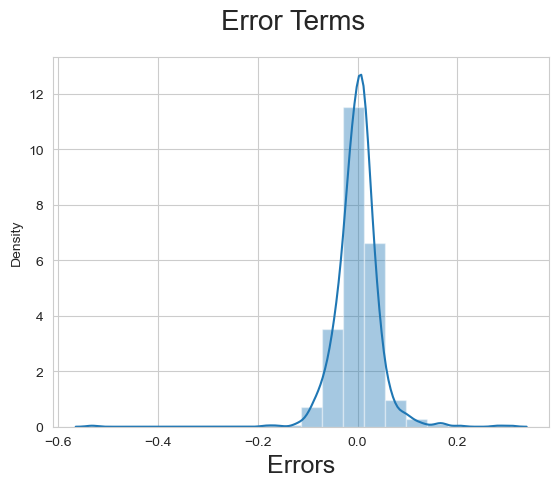

In [749]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## The residuals  follows the normally distributed with a mean 0. All good.

## Looking for patterns in the residuals

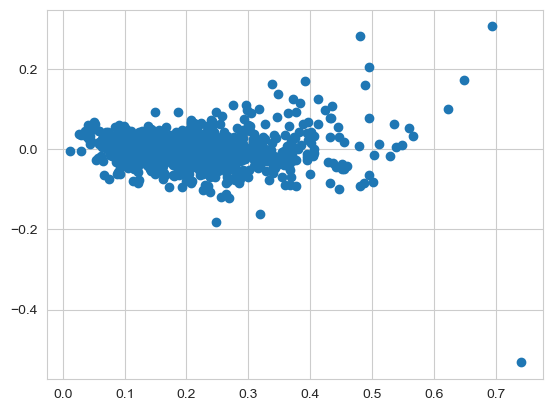

In [750]:
plt.scatter(y_train_price,(y_train - y_train_price))
plt.show()

### From above plot we can see that residuals are independent. This means that there is no correlation between the residuals and predicted values, or among the residuals themselves.

### Now we are confident that the model fit has decent predictive power. The normality of residual terms allows some inference on the coefficients.

## Model Evaluation

In [751]:
y_pred = lm.predict(X_test)

Text(0, 0.5, 'y_pred')

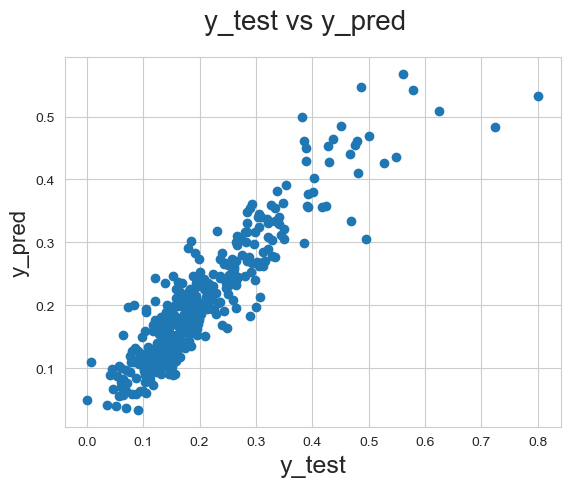

In [752]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# Conclusion

In [753]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.840945,0.840298,0.840199
1,R2 Score (Test),0.840300,0.839711,0.840889
2,RSS (Train),1.915096,1.922877,1.924070
3,RSS (Test),0.776483,0.779344,0.773618
4,MSE (Train),0.043609,0.043698,0.043711
5,MSE (Test),0.042396,0.042474,0.042318


### As we see in final_metric result that Train R2 score for Linear, Ridge and Lasso Regression are almost same but Test R2 score is high for Lasso comapred to Linear and Ridge . Therefore we will consider Lasso as our final model.
### Lasso also helps in feature selection apart from reducing overfitting

## Note: We won't  features below 15 because that is significantly reducing the R2 score. 
## This model is simple considering the feature drop from initial 80 (excluding SalePrice) to 15

In [754]:
# Final Model
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso (Train R2 score): ",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso (Test R2 score): ",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso (Train R2 score):  0.8401992901314188
Lasso (Test R2 score):  0.840888929980365


In [755]:
sorted_df.head() ## sorted in descending order on Lasso column

,Feature,Linear,Ridge,Lasso
0,OverallQual_Very Excellent,0.237698,0.218956,0.229611
1,TotalBsmtSF,0.186241,0.176189,0.185061
2,OverallQual_Excellent,0.178018,0.170665,0.174203
3,2ndFlrSF,0.107520,0.103693,0.105943
4,OverallQual_Very Good,0.099781,0.097881,0.098817


In [756]:
sorted_df2.head() ## sorted in descending order on Ridge column

,Feature,Linear,Ridge,Lasso
0,OverallQual_Very Excellent,0.237698,0.218956,0.229611
1,TotalBsmtSF,0.186241,0.176189,0.185061
2,OverallQual_Excellent,0.178018,0.170665,0.174203
3,2ndFlrSF,0.107520,0.103693,0.105943
4,OverallQual_Very Good,0.099781,0.097881,0.098817


## Top 5 significant features

### 1) OverallQual_Very Excellent : Very Excellent (10) rating of the overall material and finish of the house
### 2) TotalBsmtSF : Total square feet of basement area
### 3) OverallQual_Excellent : Excellent (9) rating of the overall material and finish of the house 
### 4) 2ndFlrSF : Second floor square feet
### 5) OverallQual_Very Good : Very Good (8) rating of the overall material and finish of the house

### Best alpha value for Lasso : 0.0001
### Best alpha value for Ridge : 1.0

# Assignment Part 2 - Subjective Questions Calculation and Analysis

## Question-1
### Sub part 1: What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 

In [757]:
lasso2 = Lasso(alpha=0.0002) ## double the alpha and interpret the result
lasso2.fit(X_train,y_train)

y_train_pred2 = lasso2.predict(X_train)
y_test_pred2 = lasso2.predict(X_test)

print("Lasso Train R2 score: ",r2_score(y_true=y_train,y_pred=y_train_pred2).round(6))
print("Lasso Test R2 score: ",r2_score(y_true=y_test,y_pred=y_test_pred2).round(6))

ridge2 = Ridge(alpha=2.0) ## double the alpha and interpret the result
ridge2.fit(X_train,y_train)

y_train_pred2 = ridge2.predict(X_train)
y_test_pred2 = ridge2.predict(X_test)

print("Ridge Train R2 score: ",r2_score(y_true=y_train,y_pred=y_train_pred2).round(6))
print("Ridge Test R2 score: ",r2_score(y_true=y_test,y_pred=y_test_pred2).round(6))

Lasso Train R2 score:  0.839152
Lasso Test R2 score:  0.840816
Ridge Train R2 score:  0.838767
Ridge Test R2 score:  0.838242


### Sub part 2: What will be the most important predictor variables after the change is implemented?

### Lets observe the changes in the coefficients after above regularization

In [758]:
betas2 = pd.DataFrame({"Feature":X_train.columns})

In [759]:
betas2.rows = X_train.columns

In [760]:
betas2['Ridge'] = ridge2.coef_
betas2['Lasso'] = lasso2.coef_

In [761]:
pd.set_option('display.max_rows', None)
betas2

,Feature,Ridge,Lasso
0,LotFrontage,0.056692,0.046399
1,BsmtFinSF1,0.087933,0.083275
2,TotalBsmtSF,0.167703,0.184122
3,2ndFlrSF,0.100434,0.104895
4,FullBath,0.050002,0.040758
5,Fireplaces,0.049094,0.045706
6,GarageCars,0.092509,0.091183
7,LotShape_IR2,0.034917,0.029178
8,Neighborhood_Crawfor,0.034170,0.030882
9,Neighborhood_Veenker,0.032168,0.012037


In [762]:
betas2_ = betas2[betas2["Lasso"] > 0]

In [763]:
betas2.shape

(15, 3)

In [764]:
betas2_.shape

(14, 3)

In [765]:
list(set(betas2["Feature"]) - set(betas2_["Feature"]))

['Exterior1st_Stone']

In [766]:
sorted_df_lasso = betas2_.sort_values(by=['Lasso'], ascending=False).reset_index(drop=True)

In [767]:
sorted_df_lasso.head()

,Feature,Ridge,Lasso
0,OverallQual_Very Excellent,0.203227,0.221557
1,TotalBsmtSF,0.167703,0.184122
2,OverallQual_Excellent,0.164144,0.170478
3,2ndFlrSF,0.100434,0.104895
4,OverallQual_Very Good,0.096258,0.097541


In [768]:
sorted_df_ridge = betas2_.sort_values(by=['Ridge'], ascending=False).reset_index(drop=True)

In [769]:
sorted_df_ridge.head()

,Feature,Ridge,Lasso
0,OverallQual_Very Excellent,0.203227,0.221557
1,TotalBsmtSF,0.167703,0.184122
2,OverallQual_Excellent,0.164144,0.170478
3,2ndFlrSF,0.100434,0.104895
4,OverallQual_Very Good,0.096258,0.097541


## Question-3:
## After building the model, you realised that the five most important predictor variables in the lasso model 
## are not available in the incoming data. 
## You will now have to create another model excluding the five most important predictor variables. 
## Which are the five most important predictor variables now?

In [770]:
top_5_features_to_drop = list(sorted_df_lasso["Feature"].head())

In [771]:
top_5_features_to_drop

['OverallQual_Very Excellent',
 'TotalBsmtSF',
 'OverallQual_Excellent',
 '2ndFlrSF',
 'OverallQual_Very Good']

In [772]:
new_cols = list(set(sorted_df_lasso["Feature"]) - set(top_5_features_to_drop))

In [773]:
X_train = X_train[new_cols]

In [774]:
X_train.shape

(1007, 9)

In [775]:
X_test = X_test[new_cols]

In [776]:
X_test.shape

(432, 9)

## Multiple Linear Regression

In [777]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [778]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.06141801749013798
[0.00187549 0.04474582 0.20344702 0.13606035 0.10945213 0.0441312
 0.03750029 0.1737859  0.10336857]


In [779]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric.append(mse_test_lr**0.5)

Train R2 Score:  0.6379376164746339
Test R2 Score:  0.6270436593948937
Train RSS:  4.359388364031727
Test RSS:  1.8133614644700378
Train MSE:  0.004329084770637265
Test MSE:  0.004197595982569532


## Ridge Regression

In [780]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [781]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 8.0}


In [782]:
#Fitting Ridge model for alpha = 8.0 and printing coefficients which have been penalised
alpha = 8.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[0.00680426 0.03771782 0.18155569 0.12039142 0.08568604 0.03371334
 0.01934392 0.14903755 0.10287791]


In [783]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric2.append(mse_test_lr**0.5)

Train R2 Score:  0.6295856149249986
Test R2 Score:  0.6209806271415638
Train RSS:  4.45995009048709
Test RSS:  1.842840703321935
Train MSE:  0.004428947458279136
Test MSE:  0.004265834961393368


## Lasso Regression

In [784]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [785]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [786]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [787]:
lasso.coef_

array([0.        , 0.00843193, 0.2039137 , 0.1169159 , 0.05447218,
       0.01260954, 0.        , 0.15440336, 0.10150427])

In [788]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric3.append(mse_test_lr**0.5)

Train R2 Score:  0.6233719037227949
Test R2 Score:  0.6254944829820857
Train RSS:  4.534765872365858
Test RSS:  1.8208937584755351
Train MSE:  0.004503243170174635
Test MSE:  0.004215031848322998


In [789]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.637938,0.629586,0.623372
1,R2 Score (Test),0.627044,0.620981,0.625494
2,RSS (Train),4.359388,4.459950,4.534766
3,RSS (Test),1.813361,1.842841,1.820894
4,MSE (Train),0.065796,0.066550,0.067106
5,MSE (Test),0.064789,0.065313,0.064923


## Lets observe the changes in the coefficients after regularization

In [790]:
betas = pd.DataFrame({"Feature":X_train.columns})

In [791]:
betas.rows = X_train.columns

In [792]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [793]:
pd.set_option('display.max_rows', None)
betas

,Feature,Linear,Ridge,Lasso
0,OverallQual_Good,0.001875,0.006804,0.000000
1,LotShape_IR2,0.044746,0.037718,0.008432
2,GarageCars,0.203447,0.181556,0.203914
3,BsmtFinSF1,0.136060,0.120391,0.116916
4,LotFrontage,0.109452,0.085686,0.054472
5,Neighborhood_Crawfor,0.044131,0.033713,0.012610
6,Neighborhood_Veenker,0.037500,0.019344,0.000000
7,FullBath,0.173786,0.149038,0.154403
8,Fireplaces,0.103369,0.102878,0.101504


In [794]:
betas_ = betas[betas["Lasso"] > 0]

In [795]:
betas.shape

(9, 4)

In [796]:
betas_.shape

(7, 4)

In [797]:
sorted_df_lasso_new = betas_.sort_values(by=['Lasso'], ascending=False).reset_index(drop=True)

In [798]:
sorted_df_lasso_new.head()

,Feature,Linear,Ridge,Lasso
0,GarageCars,0.203447,0.181556,0.203914
1,FullBath,0.173786,0.149038,0.154403
2,BsmtFinSF1,0.136060,0.120391,0.116916
3,Fireplaces,0.103369,0.102878,0.101504
4,LotFrontage,0.109452,0.085686,0.054472


In [799]:
sorted_df_ridge_new = betas_.sort_values(by=['Ridge'], ascending=False).reset_index(drop=True)

In [800]:
sorted_df_ridge_new

,Feature,Linear,Ridge,Lasso
0,GarageCars,0.203447,0.181556,0.203914
1,FullBath,0.173786,0.149038,0.154403
2,BsmtFinSF1,0.136060,0.120391,0.116916
3,Fireplaces,0.103369,0.102878,0.101504
4,LotFrontage,0.109452,0.085686,0.054472
5,LotShape_IR2,0.044746,0.037718,0.008432
6,Neighborhood_Crawfor,0.044131,0.033713,0.012610
